# Estimate Profit for Startups


# Step 1- Data Ingestion

Load the csv file as dataframe


In [2]:
import pandas as pd

df=pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Step 2- Perform basic Data quality checks


In [3]:
print("Rows, columns = ",df.shape)

Rows, columns =  (50, 5)


In [4]:
#checking for missing values
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

Analysis confirms there are no missing values in the dataset


In [5]:
#Checking for duplicate values

df.duplicated().sum()

np.int64(0)

In [6]:
#to drop duplicates incase they exist
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape # to recheck dataframe after changes(if any)

(50, 5)

No change in dataframe size, hence duplicates are absent in the dataset


# Step 3- Exploratory Data Analysis

Using Seaborn for clean data visualization


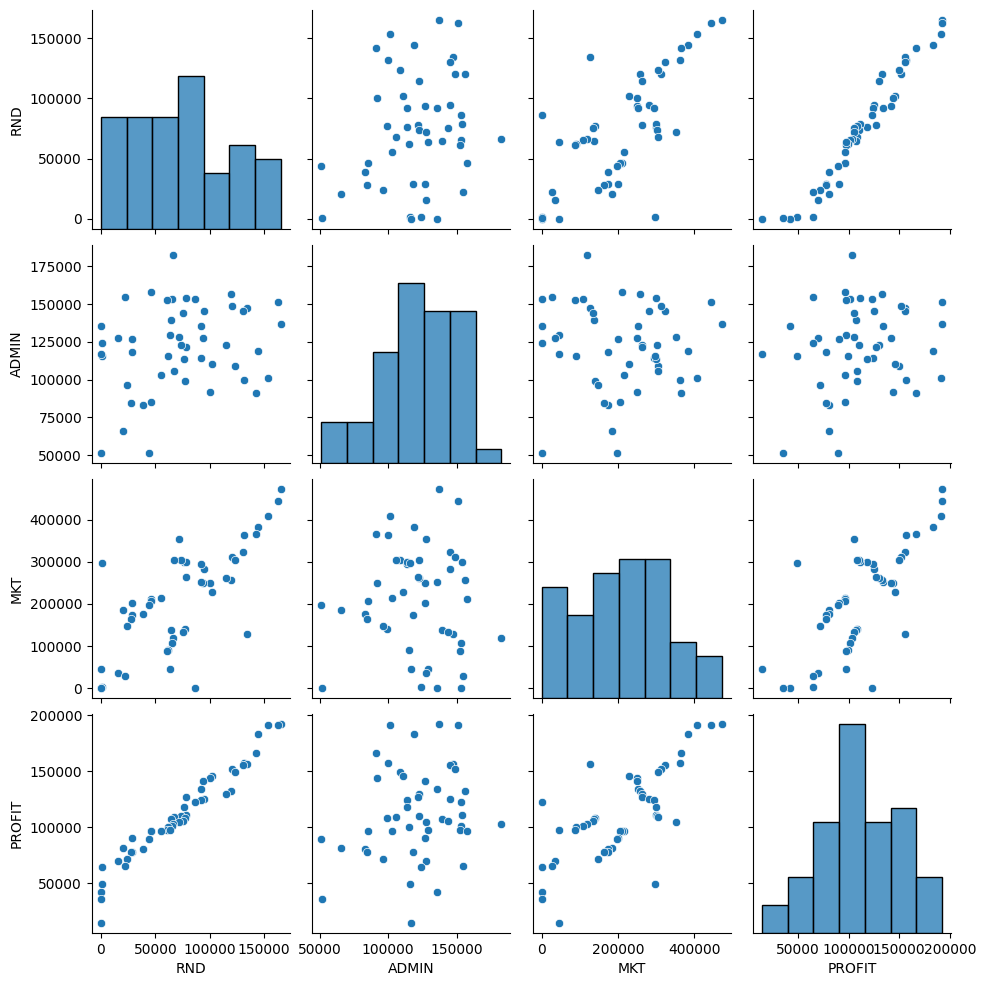

In [7]:
import seaborn as sns

sns.pairplot(data=df)

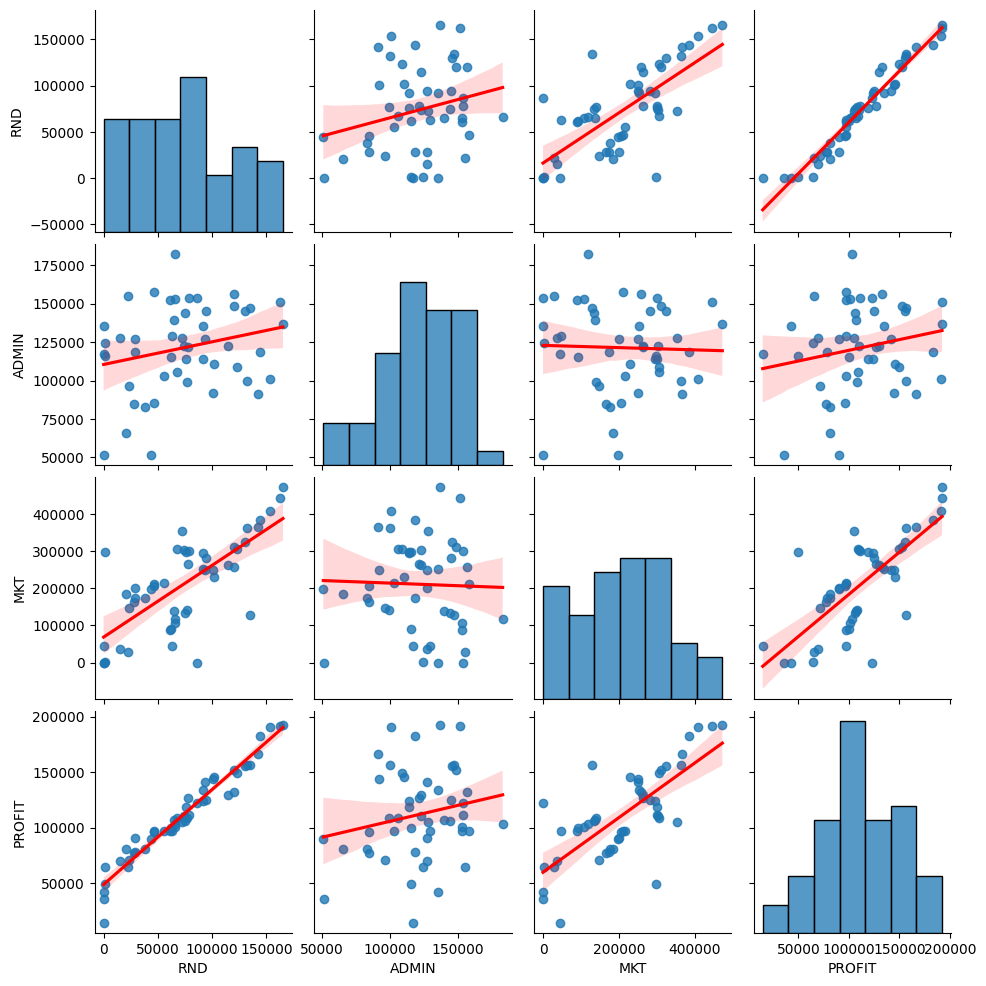

In [8]:
# Fitting regression line for trend analysis and line fitting

sns.pairplot(data=df, kind="reg", plot_kws={"line_kws":{"color":"Red"}})

Pairplot clearly shows there is strong correlation between RND and Profit linearly


In [9]:
corr = df.corr(numeric_only=True)
corr

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


<Axes: >

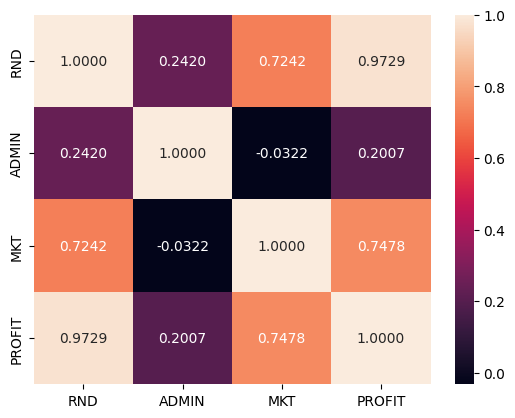

In [10]:
sns.heatmap(data=corr, annot=True, fmt=".4f")

Highest promise is shown by RND and MKT in contribution to profit changes


# Step 4- Simple Linear Regression(1 Target Feature, 1 Predictor)

1. Profit(Target) ~ RND(Predictor)
2. Profit prediction = B0 + B1\*RND


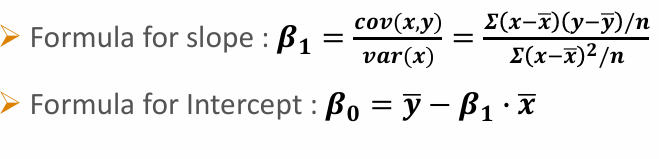


We use SKlearn for implementing Linear Regression


# - Separate X and Y attributes


In [11]:
x = df[["RND"]] # Taking x in dataframe type
y = df["PROFIT"] # Taking y in linear type

In [12]:
x.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [13]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: PROFIT, dtype: float64

# Regression Model making starts

We use Sklearn for making a Linear Regression model that will successfully predict the Y dependent variable for given input of X indpendent variable


In [14]:
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()
model_1.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
# checking for B0 Beta knot intercept
model_1.intercept_

np.float64(49032.89914125215)

In [16]:
# Checking for B1 Beta 1 coefficient
model_1.coef_

array([0.85429137])

# Profit_prediction = B0 + B1\*RND

# profit_pred = 49032.89914 + 0.8542\*RND


# Step 5 - Model Evaluation


In [17]:
# R2 score on data
model_1.score(x,y)
#print(f"R2 Score is {model_1.score(X_test, y_test) * 100:.2%}")

0.9465353160804393

<Axes: xlabel='RND', ylabel='PROFIT'>

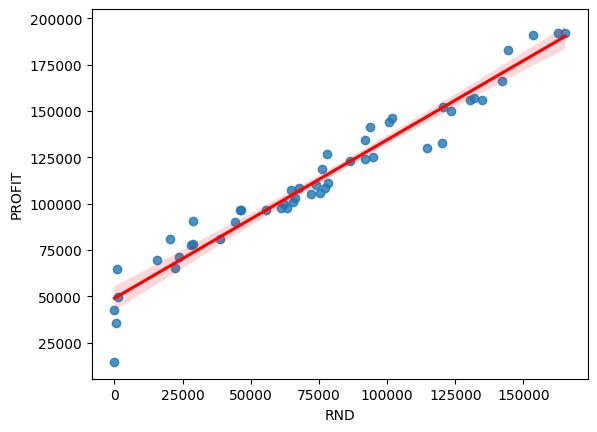

In [18]:
sns.regplot(data=df, x='RND', y='PROFIT', line_kws={'color':'red'})

In [19]:
# Predictions given by straight line
preds = model_1.predict(x)
preds[0:5]


array([190289.29389289, 187938.71118575, 180116.65707807, 172369.00320589,
       170433.97345032])

In [20]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: PROFIT, dtype: float64

In [21]:
from sklearn.metrics import(
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

# - Making a model evaluation function


In [22]:
def evaluate_model(model_1, x, y):
    # Predict results for x
    y_preds = model_1.predict(x)
    # Calculate the metrics
    rmse = root_mean_squared_error(y,y_preds)
    mae = mean_absolute_error(y, y_preds)
    mape = mean_absolute_percentage_error(y, y_preds)
    r2 = r2_score(y, y_preds)

    # Printing above results
    print(f'RMSE = {rmse:.3f}')
    print(f'MAE = {mae:.3f}')
    print(f'MAPE = {mape:.3%}')
    print(f'R2 = {r2:.3%}')

In [23]:
evaluate_model(model_1, x, y)

RMSE = 9226.101
MAE = 6910.984
MAPE = 11.070%
R2 = 94.654%


# It can be clearly seen from above that the model is performing good and can be used for out of sample prediction


In [24]:
# Estimating profit for any RND value
import warnings
warnings.filterwarnings('ignore')
rnd = 100000
profit_pred = model_1.predict([[rnd]])
print(profit_pred)

[134462.03623513]


In [25]:
user_rnd = int(input("Enter your RND budget: "))
print(f"For RND budget of {user_rnd}, Profit will be ",model_1.predict([[user_rnd]]))

For RND budget of 40000, Profit will be  [83204.5539788]


In [26]:
x.describe()

,RND
count,50.000000
mean,73721.615600
std,45902.256482
min,0.000000
25%,39936.370000
50%,73051.080000
75%,101602.800000
max,165349.200000


In [27]:
y.describe()

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: PROFIT, dtype: float64

# Multiple Linear Regression

Single Target feature is dependent on multiple features.

PROFIT ~ RND, MKT, ADMIN

PROFIT = B0 + B1xRND + B2xMKT + B3xADMIN


In [44]:
# Separating X with multiple predictors and Y from the dataframe

X = df[["RND", "MKT", "ADMIN"]]
Y = df["PROFIT"]

In [45]:
X.head()

,RND,MKT,ADMIN
0,165349.20,471784.10,136897.80
1,162597.70,443898.53,151377.59
2,153441.51,407934.54,101145.55
3,144372.41,383199.62,118671.85
4,142107.34,366168.42,91391.77


In [46]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: PROFIT, dtype: float64

In [47]:
Y.describe()

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: PROFIT, dtype: float64

In [48]:
model_2 = LinearRegression()
model_2.fit(X,Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [49]:
print("Intercept(B0):", model_2.intercept_)
print("Coefficients(B1, B2, B3):", model_2.coef_)


Intercept(B0): 50122.192989865274
Coefficients(B1, B2, B3): [ 0.80571505  0.02722806 -0.02681597]


It’s the predicted value of Y when all features (X’s) are 0.

Think of it as where your regression line crosses the Y-axis.

| Term                       | Meaning                                                                                     | Example interpretation                                                      |
| -------------------------- | ------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------- |
| **B₀ (Intercept)**         | Predicted profit when RND, MKT, and ADMIN = 0                                               | The base profit (maybe from existing customers, brand, etc.)                |
| **B₁ (RND coefficient)**   | Change in profit for every 1-unit increase in R&D spend, **keeping MKT and ADMIN constant** | If B₁ = 0.85, every extra ₹1 spent on R&D adds ₹0.85 to profit (on average) |
| **B₂ (MKT coefficient)**   | Change in profit for every 1-unit increase in Marketing spend, holding others fixed         | If B₂ = 0.3, marketing helps, but less than R&D                             |
| **B₃ (ADMIN coefficient)** | Change in profit for every 1-unit increase in Admin cost, keeping others fixed              | If B₃ = -0.02, high admin costs slightly _reduce_ profit                    |


In [50]:
coefs = pd.Series(model_2.coef_, index=X.columns)
coefs

RND      0.805715
MKT      0.027228
ADMIN   -0.026816
dtype: float64

# Evaluating the multiple linear regression model 2.0


In [51]:
evaluate_model(model_2, X, Y)

RMSE = 8855.344
MAE = 6471.450
MAPE = 10.601%
R2 = 95.075%


Model R2 score is >80% hence the model 2.0 can be used for out of sample prediction


In [55]:
X.columns

Index(['RND', 'MKT', 'ADMIN'], dtype='object')

In [58]:
X.values[0:5]

array([[165349.2 , 471784.1 , 136897.8 ],
       [162597.7 , 443898.53, 151377.59],
       [153441.51, 407934.54, 101145.55],
       [144372.41, 383199.62, 118671.85],
       [142107.34, 366168.42,  91391.77]])

### Out of sample prediction


In [60]:
# Taking user input for out of sample prediction

user_rnd = int(input("Enter your RND budget: "))
user_mkt = int(input("Enter your MKT budget: "))
user_admin = int(input("Enter your ADMIN budget: "))

profit_pred = model_2.predict([[user_rnd,user_mkt,user_admin]])
print(f"Profit is {profit_pred} for RND budget of {user_rnd}, MKT budget of {user_mkt}, ADMIN budget of {user_admin}")

Profit is [131578.56553447] for RND budget of 100000, MKT budget of 130000, ADMIN budget of 99000
